# 4. 라이브러리
## 4.2. Pandas 라이브러리
### 4.2.1. 판다스 객체
#### 4.2.1.1. 판다스 객체 소개
+ Pandas
  + NumPy를 기반으로 만들어진 데이터 분석용 라이브러리
  + 레이블(label)로 식별되는 데이터를 쉽게 다룰 수 있도록 지원
  + 고성능 데이터 조작, 탐색, 전처리, 변환, 요약, 통계 연산 기능 제공
  + 주요 객체로는 Series(1차원), DataFrame(2차원), Index(레이블 관리 구조)가 있음

<br>

|객체|설명|
|:---:|:------------|
|Series|- 1차원 레이블이 붙은 배열로, 각 데이터에 고유한 인덱스가 있음 <br>- 모든 원소가 동일한 자료형으로 저장되며, 숫자, 문자열, bool 등 다양한 자료형을 지원|
|DataFrame|- 2차원 표 형태의 데이터 구조로, 행(row)과 열(column)로 구성됨 <br>- 각 열은 Series로 구성되어 있으며, 각 열이 서로 다른 자료형을 가질 수 있음 <br>- DataFrame은 정렬(같은 인덱스 공유)된 Series 객체의 연속으로 볼 수 있음|
|Index|- 데이터에 레이블을 부여하는 객체로, 행 또는 열에 사용됨 <br>- 데이터 정렬, 선택, 결합 등을 효율적으로 할 수 있도록 지원|

<br>

#### 4.2.1.2. 판다스 객체 생성

|함수|설명|
|:---:|:------------|
|pd.Series()|1차원 Series 객체 생성|
|pd.DataFrame()|2차원 DataFrame 객체 생성|
|pd.Index()|Index 객체 생성|

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Series 생성1 : 리스트 사용
sr = pd.Series([1, 2, 3, 4, 5])
print(sr)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [3]:
# Series 생성2 : 넘파이 배열 사용
sr = pd.Series(np.array([1, 2, 3, 4, 5]))
print(sr)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [4]:
# Series 생성3 : 딕셔너리 사용
# 딕셔너리 키는 인덱스로 자동 지정됨
sr = pd.Series({'a': 10, 'b': 20, 'c': 30})
print(sr)

a    10
b    20
c    30
dtype: int64


In [5]:
# Series 생성4 : 인덱스 지정
sr = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
print(sr)

a    1
b    2
c    3
dtype: int64


In [6]:
# DataFrame 생성1 : Series 사용
sr = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
df = pd.DataFrame(sr, columns = ['value'])
print(df)

   value
a      1
b      2
c      3


In [7]:
# DataFrame 생성2 : 리스트 사용
lst = [['Alice', 22], ['Bob', 20], ['Charlie', 27]]
df = pd.DataFrame(lst, columns=['Name', 'Age'])
print(df)

      Name  Age
0    Alice   22
1      Bob   20
2  Charlie   27


In [8]:
# DataFrame 생성3 : 넘파이 배열 사용
arr = np.array([['Alice', 22], ['Bob', 20], ['Charlie', 27]])
df = pd.DataFrame(arr, columns=['Name', 'Age'])
print(df)

      Name Age
0    Alice  22
1      Bob  20
2  Charlie  27


In [9]:
# DataFrame 생성4 : 딕셔너리 사용
# 딕셔너리 키는 열 이름으로 자동 지정됨
dct = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [22, 20, 27]}
df = pd.DataFrame(dct)
print(df)

      Name  Age
0    Alice   22
1      Bob   20
2  Charlie   27


In [10]:
# DataFrame 생성5 : 딕셔너리 + 리스트 컴프리헨션 사용
dct = [{'a': i, 'b': 2*i} for i in range(3)]
df = pd.DataFrame(dct)
print(df)

   a  b
0  0  0
1  1  2
2  2  4


In [11]:
# DataFrame 생성6 : Series 사용
# 서로 다른 인덱스를 가진 Series로 DataFrame을 생성하면
# 공통된 인덱스를 기준으로 맞춰지고, 누락된 값은 NaN(Not a Number)으로 채워짐
sr1 = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
sr2 = pd.Series([4, 5, 6], index = ['a', 'c', 'd'])
df = pd.DataFrame({'x': sr1, 'y': sr2})
print(df)

     x    y
a  1.0  4.0
b  2.0  NaN
c  3.0  5.0
d  NaN  6.0


In [12]:
# DataFrame 생성7 : 인덱스 및 열 이름 지정
data = [[101, 22], [102, 20], [103, 27]]
columns = ['ID', 'Age']
index = ['Alice', 'Bob', 'Charlie']
df = pd.DataFrame(data, columns=columns, index=index)
print(df)

          ID  Age
Alice    101   22
Bob      102   20
Charlie  103   27


In [13]:
# Index 생성1 : 리스트 사용
idx = pd.Index(['a', 'b', 'c', 'd'])
idx

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
# Index 생성2 : range() 사용
idx = pd.Index(range(1, 6))
idx

RangeIndex(start=1, stop=6, step=1)

<br>

#### 4.2.1.3. 데이터프레임 속성

|속성|설명|
|:---:|:------------|
|.shape|데이터프레임의 모양(행, 열)|
|.index|행 인덱스 조회 및 변경|
|.columns|열 이름 조회 및 변경|
|.dtypes|각 열의 자료형 확인|

In [15]:
# 데이터프레임 속성
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 28],
    'Score': [85.5, 90.3, 78.2, 88.9, 92.5]
})

print(df.shape)
print(df.index)
print(df.columns)
print(df.dtypes)

(5, 3)
RangeIndex(start=0, stop=5, step=1)
Index(['Name', 'Age', 'Score'], dtype='object')
Name      object
Age        int64
Score    float64
dtype: object


In [16]:
# 행 인덱스 변경
df.index = ['a', 'b', 'c', 'd', 'e']
print(df)

      Name  Age  Score
a    Alice   25   85.5
b      Bob   30   90.3
c  Charlie   35   78.2
d    David   40   88.9
e      Eva   28   92.5


In [17]:
# 열 이름 변경
df.columns = ['Student Name', 'Student Age', 'Exam Score']
print(df)

  Student Name  Student Age  Exam Score
a        Alice           25        85.5
b          Bob           30        90.3
c      Charlie           35        78.2
d        David           40        88.9
e          Eva           28        92.5


<br>

#### 4.2.1.4. 데이터프레임 정보 조회

|함수|설명|
|:---:|:------------|
|info()|기본 정보(행 개수, 열 개수, 데이터 자료형, 결측값 여부 등) 출력|
|head()|상위 n개의 행 출력(초기 값 n=5)|
|describe()|수치형 데이터의 요약 통계량(평균, 표준편차 등) 제공|

In [18]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 28],
    'Score': [85.5, 90.3, 78.2, 88.9, 92.5]
})

In [19]:
# 기본 정보
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   Age     5 non-null      int64  
 2   Score   5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes
None


In [20]:
# 상위 5개 행
print(df.head())

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   90.3
2  Charlie   35   78.2
3    David   40   88.9
4      Eva   28   92.5


In [21]:
# 요약 통계량
print(df.describe())

            Age      Score
count   5.00000   5.000000
mean   31.60000  87.080000
std     5.94138   5.576917
min    25.00000  78.200000
25%    28.00000  85.500000
50%    30.00000  88.900000
75%    35.00000  90.300000
max    40.00000  92.500000


<br>

### 4.2.2. 데이터프레임 인덱싱과 슬라이싱
#### 4.2.2.1. 열 인덱싱과 슬라이싱
+ 열 이름을 사용하여 직접 선택
  + 여러 개의 열을 선택할 때는 열 이름을 리스트로 작성
+ `loc[:, ]` : 레이블(label) 기반 접근 방식
+ `iloc[:, ]` : 정수(integer) 기반 접근 방식

In [22]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': [10, 11, 12]
}, index=['x', 'y', 'z'])

In [23]:
# 열 인덱싱과 슬라이싱1 : 열 이름 사용
df['A']                                      # 열 이름
df[['A', 'C']]                               # 열 이름 리스트
#df['A':'B']                                 # 열 이름 슬라이싱은 안 됨, Error!

,A,C
x,1,7
y,2,8
z,3,9


In [24]:
# 열 인덱싱과 슬라이싱2 : 레이블 기반 접근
df.loc[:, 'A']                               # 열 이름
df.loc[:, ['A', 'C']]                        # 열 이름 리스트
df.loc[:, 'A':'B']                           # 열 이름 슬라이싱
df.loc[:, 'B'::2]                            # 열 이름 스트라이딩
df.loc[:, [True, False, True, True]]         # bool 리스트

,A,C,D
x,1,7,10
y,2,8,11
z,3,9,12


In [25]:
# 열 인덱싱과 슬라이싱3 : 정수 기반 접근
df.iloc[:, 0]                                # 정수
df.iloc[:, [0, 3]]                           # 정수 리스트
df.iloc[:, range(2)]                         # range
df.iloc[:, 0:3]                              # 슬라이싱
df.iloc[:, 1::2]                             # 스트라이딩

,B,D
x,4,10
y,5,11
z,6,12


<br>

#### 4.2.2.2. 행 인덱싱과 슬라이싱
+ `loc[, :]` : 레이블(label) 기반 접근 방식
+ `iloc[, :]` : 정수(integer) 기반 접근 방식

In [26]:
# 행 인덱싱과 슬라이싱1 : 레이블 기반 접근
df.loc['x', ]                                # 인덱스 이름
df.loc[['x', 'y'], :]                        # 인덱스 이름 리스트
df.loc['x':'y', :]                           # 인덱스 이름 슬라이싱
df.loc['x'::1, :]                            # 인덱스 이름 스트라이딩
df.loc[[True, False, True], :]               # bool 리스트
df.loc[list(df['A'] < 3), :]                 # bool 리스트
df.loc[df['A'] < 3, :]                       # bool 리스트

,A,B,C,D
x,1,4,7,10
y,2,5,8,11


In [27]:
# 행 인덱싱과 슬라이싱2 : 정수 기반 접근
df.iloc[0, :]                                # 정수
df.iloc[[0, 2], :]                           # 정수 리스트
df.iloc[range(2), :]                         # range
df.iloc[0:1, :]                              # 슬라이싱
df.iloc[1::2, :]                             # 스트라이딩
df.iloc[[True, False, True], :]              # bool 리스트 (권장하지 않음)
df.iloc[list(df['A'] < 3), :]                # bool 리스트 (권장하지 않음)
#df.iloc[df['A'] < 3, :]                     # bool 리스트 (Error!)

,A,B,C,D
x,1,4,7,10
y,2,5,8,11


In [28]:
# 행 인덱싱과 슬라이싱3 : 정수 기반 접근
df.iloc[0]                                   # 정수
df.iloc[[0, 2]]                              # 정수 리스트
df.iloc[range(2)]                            # range
df.iloc[0:1]                                 # 슬라이싱
df.iloc[1::2]                                # 스트라이딩
df.iloc[[True, False, True]]                 # bool 리스트(권장하지 않음)
df.iloc[list(df['A'] < 3)]                   # bool 리스트(권장하지 않음)
#df.iloc[df['A'] < 3]                        # bool 리스트 (Error!)

,A,B,C,D
x,1,4,7,10
y,2,5,8,11


In [29]:
# 행 인덱싱과 슬라이싱4
# 인덱싱은 열을 참조하는 반면, 슬라이싱은 행을 참조함
#df[0]                                       # Error!
df[0:2]                                      # 권장하지 않음
df['x':'y']                                  # 권장하지 않음
df[df['A'] < 3]                              # 불리언 인덱싱은 행 단위로 적용됨

,A,B,C,D
x,1,4,7,10
y,2,5,8,11


In [30]:
# 행 인덱싱과 슬라이싱5
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': [10, 11, 12]})

df.loc[0:1]                                  # 명시적 인덱스(label) 사용 - 마지막 인덱스 포함
df.iloc[0:1]                                 # 암묵적 인덱스(integer) 사용 - 마지막 인덱스 제외
df[0:1]                                      # 암묵적 인덱스(integer) 사용, iloc와 동일

,A,B,C,D
0,1,4,7,10


<br>

### 4.2.3. 데이터프레임 연산
#### 4.2.3.1. 데이터프레임 기본 연산
+ NumPy와 동일하게 벡터화, 브로드캐스팅 모두 지원
+ 단항 연산: 인덱스와 열 레이블 보존
+ 이항 연산: 인덱스와 열 레이블을 기준으로 자동 정렬되어 연산
  + 위치가 아닌 동일한 레이블끼리 연산하며, 일치하지 않는 항목은 `NaN`으로 처리

In [31]:
# 단항 연산1 : Series
sr = pd.Series([1, 2, 3, 4, 5])
print(sr + 2)

0    3
1    4
2    5
3    6
4    7
dtype: int64


In [32]:
# 단항 연산2 : DataFrame
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [11, 12, 13, 14, 15] 
})
print(np.log(df))

          x         y
0  0.000000  2.397895
1  0.693147  2.484907
2  1.098612  2.564949
3  1.386294  2.639057
4  1.609438  2.708050


In [33]:
# 이항 연산1 : Series
# 두 시리즈에 존재하는 모든 행 인덱스를 포함한 결과 생성 (합집합처럼 동작)
math = pd.Series({'Alice': 85, 'Bob': 90, 'Charlie': 78})
english = pd.Series({'Alice': 95, 'Charlie': 80, 'David': 88})
print(math + english)

Alice      180.0
Bob          NaN
Charlie    158.0
David        NaN
dtype: float64


In [34]:
# 이항 연산2: DataFrame
midterm = pd.DataFrame({
    'math': [85, 90, 78],
    'science': [88, 92, 79]
}, index=['Alice', 'Bob', 'Charlie'])

final = pd.DataFrame({
    'math': [95, 88, 82],
    'english': [95, 80, 88]
}, index=['Alice', 'Charlie', 'David'])

print(midterm + final)

         english   math  science
Alice        NaN  180.0      NaN
Bob          NaN    NaN      NaN
Charlie      NaN  166.0      NaN
David        NaN    NaN      NaN


<br>

#### 4.2.3.2. 연산자 메소드
+ 인덱스와 열 레이블이 일치하지 않아도 연산 가능
+ 예외 처리가 필요한 경우 기본 연산자보다 안정적임
  + `fill_value` 인수를 사용하여 `NaN`를 다른 값으로 처리 가능

|연산자|연산자 메소드|
|:---:|:------------|
|+|add()|
|-|sub()|
|*|mul()|
|/|divide()|
|//|floordiv()|
|%|mod()|
|**|pow()|

In [35]:
# 연산자 메소드1
# midterm + final과 동일한 결과
print(midterm.add(final))

         english   math  science
Alice        NaN  180.0      NaN
Bob          NaN    NaN      NaN
Charlie      NaN  166.0      NaN
David        NaN    NaN      NaN


In [36]:
# 연산자 메소드2
# 하나의 데이터프레임에만 값이 있는 경우 0으로 처리하고, 둘 다 값이 없으면 NaN 반환
print(midterm.add(final, fill_value = 0))

         english   math  science
Alice       95.0  180.0     88.0
Bob          NaN   90.0     92.0
Charlie     80.0  166.0     79.0
David       88.0   82.0      NaN


<br>

#### 4.2.3.3. 새로운 열 생성

|함수|설명|
|:---:|:------------|
|assign()|기존 데이터프레임을 수정하지 않고, 새로운 열을 추가한 복사본을 반환|
|eval()|수식을 문자열로 작성하여 열 간 계산을 간결하게 수행(직관적인 수식 표현)|
|where()|조건에 따라 서로 다른 값을 선택하여 새로운 열 생성(NumPy 메소드)|

In [37]:
df = pd.DataFrame({
    'product': ['A', 'B', 'C', 'D', 'E'],
    'price': [100, 200, 150, 300, 250],
    'quantity': [10, 5, 3, 7, 6]
})
print(df)

  product  price  quantity
0       A    100        10
1       B    200         5
2       C    150         3
3       D    300         7
4       E    250         6


In [38]:
# 새로운 열 생성1: 기본 할당
# 기본 할당은 데이터를 직접 수정하므로, 권장하지 않음
df['total_price'] = df['price'] * df['quantity']
print(df)

  product  price  quantity  total_price
0       A    100        10         1000
1       B    200         5         1000
2       C    150         3          450
3       D    300         7         2100
4       E    250         6         1500


In [39]:
# 새로운 열 생성2: assign() 사용
print(df.assign(total_price = df['price'] * df['quantity']))

  product  price  quantity  total_price
0       A    100        10         1000
1       B    200         5         1000
2       C    150         3          450
3       D    300         7         2100
4       E    250         6         1500


In [40]:
# 새로운 열 생성3: eval() 사용
# inplace=True: 기존 데이터프레임에 직접 적용(새 객체를 반환하지 않음)
df.eval('total_price = price * quantity', inplace=True)
print(df)

  product  price  quantity  total_price
0       A    100        10         1000
1       B    200         5         1000
2       C    150         3          450
3       D    300         7         2100
4       E    250         6         1500


In [41]:
# 새로운 열 생성4: where() 사용
# 가격이 200 이상이면 'Expensive', 아니면 'Affordable'로 구분
df['price_category'] = np.where(df['price'] >= 200, 'Expensive', 'Affordable')
print(df)

  product  price  quantity  total_price price_category
0       A    100        10         1000     Affordable
1       B    200         5         1000      Expensive
2       C    150         3          450     Affordable
3       D    300         7         2100      Expensive
4       E    250         6         1500      Expensive


<br>

#### 4.2.3.4. 데이터프레임 집계
+ NumPy와 동일한 축 개념 사용
  + axis=0 : 행 방향 연산(열 단위로 요약)
  + axis 1 : 열 방향 연산(행 단위로 요약)
+ 수치형 데이터에 적용되며, NaN은 기본적으로 제외됨

|함수|설명|
|:---:|:------------|
|count()|NaN를 제외한 행의 개수|
|value_counts()|집단별 빈도|
|sum()|합계|
|mean()|평균|
|std()|표준편차|
|median()|중앙값|
|min(), max()|최소값, 최대값|
|cumsum(), cumprod()|누적 합계, 누적 곱|

In [42]:
## 실습 데이터 : tips 데이터셋
import seaborn as sns
tips = sns.load_dataset('tips')

In [43]:
# total_bill: 식사 금액
# tip: 팁 금액
# sex: 성별
# smoker: 흡연 여부
# day: 요일
# time: 식사 시간(Lunch, Dinner)
# size: 식사 인원 수
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [44]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [45]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [46]:
# 각 열의 유효한 데이터 수 (NaN 제외)
print(tips.count())

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64


In [47]:
# 식사 시간별 주문 수
print(tips.value_counts('time'))

time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [48]:
# 전체(합계) 식사 금액, 팁 금액, 식사 인원 수
print(tips[['total_bill', 'tip', 'size']].sum())

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64


In [49]:
# 고객 1인당 평균 식사 금액
print((tips['total_bill'] / tips['size']).mean())

7.888229508196722


In [50]:
# 고객 1인당 평균 팁 금액
print((tips['tip'] / tips['size']).mean())

1.2127616120218578


In [51]:
# 전체 식사 금액에서 팁이 차지하는 비율
print(tips['tip'] / tips['total_bill'])

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Length: 244, dtype: float64


In [52]:
# 전체 식사 금액에서 팁이 차지하는 비율에 대한 요약 통계량
print((tips['tip'] / tips['total_bill']).describe())

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
dtype: float64


In [53]:
# 전체 식사 금액에서 팁이 차지하는 비율이 50% 이상인 경우
print(tips[tips['tip'] / tips['total_bill'] >= 0.5])

     total_bill   tip   sex smoker  day    time  size
172        7.25  5.15  Male    Yes  Sun  Dinner     2


<br>

### 4.2.4. 고급 데이터 처리
#### 4.2.4.1. 데이터프레임 집단별 연산
+ `groupby()` 함수를 이용하여 특정 열을 기준으로 데이터를 집단화한 후, 다양한 연산 수행 가능
+ SQL의 GROUP BY와 유사한 기능을 제공하며, 집계, 변환, 필터링을 지원
 
|함수|설명|
|:---:|:------------|
|aggregate() 또는 agg()|여러 집계 함수를 동시에 적용(문자열, 함수, 리스트 등 가능)|
|filter()|집단별 집계 결과를 조건으로 집단 자체를 필터링|
|transform()|집단별 연산 결과를 원래 구조와 같은 형태로 반환(원소 개수 유지)|
|apply()|임의의 함수를 전체 집단에 유연하게 적용(집계, 반환 모두 가능)|

In [54]:
#  실습 데이터 : tips 데이터셋
tips = sns.load_dataset('tips')

In [55]:
# 요일별 평균 식사 금액
# observed=False: 모든 범주 포함, 실제 데이터가 없으면 NaN
print(tips.groupby('day', observed=False)['total_bill'].mean())

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


In [56]:
# 식사 시간별 식사 금액, 팁 금액의 평균 및 표준편차
print(tips.groupby('time', observed=False)[['total_bill', 'tip']].agg(['mean', 'std']))

       total_bill                 tip          
             mean       std      mean       std
time                                           
Lunch   17.168676  7.713882  2.728088  1.205345
Dinner  20.797159  9.142029  3.102670  1.436243


In [57]:
# 식사 시간별 식사 금액의 최대값, 팁 금액의 최소값: 딕셔너리 사용
print(tips.groupby('time', observed=False).agg({'total_bill': 'max', 'tip': 'min'}).reset_index())

     time  total_bill   tip
0   Lunch       43.11  1.25
1  Dinner       50.81  1.00


In [58]:
# 식사 시간별 식사 금액의 최대값, 팁 금액의 최소값: 튜플 사용, named aggregation 문법
print(tips.groupby('time', observed=False).agg(total_bill_max = ('total_bill', 'max'), tip_min = ('tip', 'min')).reset_index())

     time  total_bill_max  tip_min
0   Lunch           43.11     1.25
1  Dinner           50.81     1.00



<br>

+ [참고] 람다 함수(lamdba function)
  + 함수 이름 없이 일시적으로 정의해 사용할 수 있는 익명 함수
  + `def`, `return` 없이 간단한 함수 로직을 한 줄로 표현
  + 구조는 일반 함수와 같지만, 주로 짧고 단순한 연산에 사용
  + `apply()`, `filter()` 등 함수의 인수로 전달할 때 유용하게 활용

In [59]:
# 함수 정의
def f(x, y):
    return x + y
f(1, 4)

5

In [60]:
# 람다 함수
(lambda x, y: x + y)(1, 4)

5

In [61]:
# 팀 금액 평균이 3달러 이상인 요일 데이터 필터링: 함수 정의
def filter_tip_avg(x):
    return x['tip'].mean() >= 3

print(tips.groupby('day', observed=False).filter(filter_tip_avg))

     total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner     2
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
186       20.90  3.50  Female    Yes  Sun  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
188       18.15  3.50  Female    Yes  Sun  Dinner     3
189       23.10  4.00    Male    Yes  Sun  Dinner     3
190       15.69  1.50    Male    Yes  Sun  Dinner     2

[76 rows x 7 columns]


In [62]:
# 팀 금액 평균이 3달러 이상인 요일 데이터 필터링: 람다 함수 사용
print(tips.groupby('day', observed=False).filter(lambda x: x['tip'].mean() >= 3))

     total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner     2
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
186       20.90  3.50  Female    Yes  Sun  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
188       18.15  3.50  Female    Yes  Sun  Dinner     3
189       23.10  4.00    Male    Yes  Sun  Dinner     3
190       15.69  1.50    Male    Yes  Sun  Dinner     2

[76 rows x 7 columns]


In [63]:
# 성별 팁 금액의 편차
tips['tip_dev'] = tips.groupby('sex', observed=False)['tip'].transform(lambda x: x - x.mean())
print(tips[['sex', 'tip', 'tip_dev']].head())

      sex   tip   tip_dev
0  Female  1.01 -1.823448
1    Male  1.66 -1.429618
2    Male  3.50  0.410382
3    Male  3.31  0.220382
4  Female  3.61  0.776552


In [64]:
# 식사 시간별 팁 금액의 사분위수범위: 함수 정의
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

print(tips.groupby('time', observed=False)['tip'].apply(iqr))

time
Lunch     1.2875
Dinner    1.6875
Name: tip, dtype: float64


In [65]:
# 식사 시간별 팁 금액의 사분위수범위: 람다 함수 사용
print(tips.groupby('time', observed=False)['tip'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)))

time
Lunch     1.2875
Dinner    1.6875
Name: tip, dtype: float64


<br>

#### 4.2.4.2. 수식 및 조건식 기반 데이터 처리
+ eval(), query() 메소드를 사용하면 문자열 형태의 표현식을 통해 데이터를 보다 직관적으로 처리 가능
+ 복잡한 연산이나 조건 필터링을 간결하게 표현할 수 있어 가독성과 성능 모두에 유리함
  + 데이터프레임의 열 이름을 따옴표 없이 사용 가능
  + 외부 변수는 `@` 기호를 사용하여 표현식에 표현 가능


|함수|설명|
|:---:|:------------|
|eval()|- 문자열로 작성한 수식을 이용하여 기존 열을 연산하거나 새로운 열을 생성 <br>- Python 표현식을 그대로 사용할 수 있어 가독성이 높음|
|query()|- 문자열로 작성한 조건식을 이용하여 행을 필터링<br>- 복잡한 불리언 인덱싱보다 간결하고 직관적인 문법 제공 <br>- 논리 연산자는 `&`, `\|`, `~`의 사용을 권장하며, 각 조건은 괄호 ()로 감싸야 함|

In [66]:
#  실습 데이터 : tips 데이터셋
tips = sns.load_dataset('tips')

In [67]:
# 기존 열 연산: 식사 금액에서 세금 10%를 제외한 실수령 금액
print(tips.eval('total_bill = total_bill * 0.9'))

     total_bill   tip     sex smoker   day    time  size
0        15.291  1.01  Female     No   Sun  Dinner     2
1         9.306  1.66    Male     No   Sun  Dinner     3
2        18.909  3.50    Male     No   Sun  Dinner     3
3        21.312  3.31    Male     No   Sun  Dinner     2
4        22.131  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239      26.127  5.92    Male     No   Sat  Dinner     3
240      24.462  2.00  Female    Yes   Sat  Dinner     2
241      20.403  2.00    Male    Yes   Sat  Dinner     2
242      16.038  1.75    Male     No   Sat  Dinner     2
243      16.902  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [68]:
# 새로운 열 생성: 전체 식사 금액 대비 팁 금액 비율
# inplace=True: 기존 데이터프레임에 직접 적용(새 객체를 반환하지 않음)
tips.eval('tip_rate = tip / total_bill', inplace=True)
print(tips)

     total_bill   tip     sex smoker   day    time  size  tip_rate
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]


In [69]:
# 외부 변수 사용: 전체 식사 금액에 따른 기본(최소) 팁 금액
tip_percentage = 0.15
tips.eval('min_tip = total_bill * @tip_percentage', inplace = True)
print(tips)

     total_bill   tip     sex smoker   day    time  size  tip_rate  min_tip
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447   2.5485
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542   1.5510
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587   3.1515
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780   3.5520
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808   3.6885
..          ...   ...     ...    ...   ...     ...   ...       ...      ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927   4.3545
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584   4.0770
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222   3.4005
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204   2.6730
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744   2.8170

[244 rows x 9 columns]


In [70]:
# 기본(최소) 팁 금액보다 적게 준 경우 'Below', 많거나 같은 경우 'Above'로 구분
# 기본(최소) 팁 금액보다 적게 준 경우는 108팀임
tips['tip_group'] = np.where(tips['tip'] < tips['min_tip'], 'Below', 'Above')
print(tips['tip_group'].value_counts())

tip_group
Above    136
Below    108
Name: count, dtype: int64


In [71]:
# 단일 조건 필터링: 식사 금액이 20달러 이상인 경우
print(tips.query('total_bill >= 20'))

     total_bill   tip     sex smoker  day    time  size  tip_rate  min_tip  \
2         21.01  3.50    Male     No  Sun  Dinner     3  0.166587   3.1515   
3         23.68  3.31    Male     No  Sun  Dinner     2  0.139780   3.5520   
4         24.59  3.61  Female     No  Sun  Dinner     4  0.146808   3.6885   
5         25.29  4.71    Male     No  Sun  Dinner     4  0.186240   3.7935   
7         26.88  3.12    Male     No  Sun  Dinner     4  0.116071   4.0320   
..          ...   ...     ...    ...  ...     ...   ...       ...      ...   
237       32.83  1.17    Male    Yes  Sat  Dinner     2  0.035638   4.9245   
238       35.83  4.67  Female     No  Sat  Dinner     3  0.130338   5.3745   
239       29.03  5.92    Male     No  Sat  Dinner     3  0.203927   4.3545   
240       27.18  2.00  Female    Yes  Sat  Dinner     2  0.073584   4.0770   
241       22.67  2.00    Male    Yes  Sat  Dinner     2  0.088222   3.4005   

    tip_group  
2       Above  
3       Below  
4       Below  

In [72]:
# 다중 조건 필터링: 식사 인원 수가 3명 이상이고, 목요일에 방문한 경우
#print(tips.query('size >= 3 and day == "Thur"'))           # 권장하지 않음, 조건이 복잡할 경우 오류가 발생할 수 있음
print(tips.query('(size >= 3) & (day == "Thur")'))          # 권장 방식: 괄호로 각 조건을 명확히 구분

     total_bill   tip     sex smoker   day   time  size  tip_rate  min_tip  \
77        27.20  4.00    Male     No  Thur  Lunch     4  0.147059   4.0800   
85        34.83  5.17  Female     No  Thur  Lunch     4  0.148435   5.2245   
119       24.08  2.92  Female     No  Thur  Lunch     4  0.121262   3.6120   
125       29.80  4.20  Female     No  Thur  Lunch     6  0.140940   4.4700   
129       22.82  2.18    Male     No  Thur  Lunch     3  0.095530   3.4230   
141       34.30  6.70    Male     No  Thur  Lunch     6  0.195335   5.1450   
142       41.19  5.00    Male     No  Thur  Lunch     5  0.121389   6.1785   
143       27.05  5.00  Female     No  Thur  Lunch     6  0.184843   4.0575   
146       18.64  1.36  Female     No  Thur  Lunch     3  0.072961   2.7960   
197       43.11  5.00  Female    Yes  Thur  Lunch     4  0.115982   6.4665   
200       18.71  4.00    Male    Yes  Thur  Lunch     3  0.213789   2.8065   
204       20.53  4.00    Male    Yes  Thur  Lunch     4  0.19483

In [73]:
# 외부 변수 사용: 기준 팁 금액 미만인 경우
min_tip_required = 5
print(tips.query('tip < @min_tip_required'))

     total_bill   tip     sex smoker   day    time  size  tip_rate  min_tip  \
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447   2.5485   
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542   1.5510   
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587   3.1515   
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780   3.5520   
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808   3.6885   
..          ...   ...     ...    ...   ...     ...   ...       ...      ...   
238       35.83  4.67  Female     No   Sat  Dinner     3  0.130338   5.3745   
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584   4.0770   
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222   3.4005   
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204   2.6730   
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744   2.8170   

    tip_group  
0       Below  
1       Above  
2  

In [74]:
# 기준 팁 금액보다 적게 준 경우는 216팀임
print(tips.query('tip < @min_tip_required').shape[0])
print(len(tips.query('tip < @min_tip_required')))

216
216


<br>

### 4.2.5. 시계열 데이터 처리
#### 4.2.5.1. 시계열 데이터(time series data)
+ 일정한 시간 간격으로 관측된 연속적인 데이터
+ Pandas에서는 시계열 데이터를 처리하기 위한 다양한 날짜/시간 관련 객체를 제공함

<br>

|구분|설명|예|Pandas 객체|
|:---:|:------------|:------|:---------|
|타임스탬프(timestampe)|특정 시점|2025-03-02 09:00|`pd.TimeStamp`, `DatetimeIndex`|
|시간 기간(period)|일정한 시간 구간(시작~종료)|2025년 3월 (월간)|`pd.Period`, `PeriodIndex`|
|시간 델타(time delta)|두 시점 사이의 시간 간격|2일, 5시간|`pd.Timedelta`, `TimedeltaIndex`|

In [75]:
print(pd.Timestamp('2025-03-02 09:00'))      # 타임스탬프
print(pd.Period('2025-03', freq='M'))        # 시간 기간
print(pd.Timedelta(days=2, hours=5))         # 시간 델타

2025-03-02 09:00:00
2025-03
2 days 05:00:00


<br>

#### 4.2.5.2. 시계열 데이터 형식 변환
+ `pd.to_datetime()` 함수
  + 문자열이나 정수 등 다양한 형태의 데이터를 시계열 데이터(datetime 형식)로 변환
  + `format` 인자를 사용하여 날짜 형식을 명시적으로 지정 가능
  + `errors='coerce'` 인자를 사용하면 오류 발생 시 NaT(Not a Time)으로 처리
  + 시계열 인덱스를 설정하거나 변환할 때도 자주 사용됨

<br>

|코드|설명|예|
|:---:|:------------|:---:|
|%Y|전체 연도|2025|
|%B|전체 월 이름|March|
|%m|0으로 시작하는 월|03|
|%d|0으로 시작하는 일|02|
|%H|0으로 시작하는 시간(24시간제)|14|
|%I|0으로 시작하는 시간(12시간제)|09|
|%p|AM 또는 PM|AM|
|%M|0으로 시작하는 분|00|
|%S|0으로 시작하는 초|00|

In [76]:
# Timestampe1: 문자열 리스트 사용
pd.to_datetime(['2025-03-02', '2025-03-03', '2025-03-04'])

DatetimeIndex(['2025-03-02', '2025-03-03', '2025-03-04'], dtype='datetime64[ns]', freq=None)

In [77]:
# Timestampe2: 명시적 형식 지정
pd.to_datetime(['March 2, 2025', 'March 3, 2025', 'March 4, 2025'], format='%B %d, %Y')

DatetimeIndex(['2025-03-02', '2025-03-03', '2025-03-04'], dtype='datetime64[ns]', freq=None)

In [78]:
# Timestampe3: 오류 발생 시 NaT 처리
pd.to_datetime(["2025-03-02", "not a date"], errors="coerce")

DatetimeIndex(['2025-03-02', 'NaT'], dtype='datetime64[ns]', freq=None)

In [79]:
# Timestampe4: 정수 데이터프레임 사용(각 행을 날짜로 변환)
df = pd.DataFrame({
    "year": [2025, 2025],
    "month": [3, 4],
    "day": [2, 15]
})
pd.to_datetime(df)

0   2025-03-02
1   2025-04-15
dtype: datetime64[ns]

In [80]:
# Period: 2025년 3월 1일 ~ 31일(한 달)
pd.to_datetime('2025-03', format='%Y-%m').to_period('M')

Period('2025-03', 'M')

In [81]:
# Timedelta
pd.to_datetime('2025-05-13') - pd.to_datetime('2025-03-02')

Timedelta('72 days 00:00:00')

<br>

+ 정규 날짜 시퀀스 생성
  + Pandas는 일정 간격의 날짜/시간 데이터를 생성하는 기능을 제공함
  + `pd.date_range()`, `pd.period_range()`, `pd.timedelta_range()` 함수
    + `freq` 인자를 통해 날짜 간격의 빈도(frequency) 지정 가능

<br>

|코드|설명|
|:---:|:------------|
|D|일(day)|
|W|주(week)|
|ME|월말(month end)|
|QE|분기말(quarer end)|
|YE|연말(year end)|
|h|시간(hour)|
|min|분(minute)|
|s|초(second)|

In [82]:
# pd.date_range(): 하루씩 증가하는 날짜 시퀀스
pd.date_range('2025-03-02', periods=5, freq='D')

DatetimeIndex(['2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06'],
              dtype='datetime64[ns]', freq='D')

In [83]:
# pd.date_range(): 일주일씩 증가하는 날짜 시퀀스(일요일 기준)
pd.date_range('2025-05-13', periods=5, freq='W')

DatetimeIndex(['2025-05-18', '2025-05-25', '2025-06-01', '2025-06-08',
               '2025-06-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [84]:
# pd.period_range(): 2025년 3월부터 시작하여 3개월 동안의 기간
pd.period_range('2025-03', periods=3, freq='M')

PeriodIndex(['2025-03', '2025-04', '2025-05'], dtype='period[M]')

In [85]:
# pd.timedelta_range(): 1시간 간격의 시간 델타 시퀀스
pd.timedelta_range(start='0s', periods=5, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00'],
               dtype='timedelta64[ns]', freq='h')

<br>

#### 4.2.5.3. 시계열 데이터 인덱스와 필터링
+ 시계열 데이터를 인덱스로 설정하면, 시간 기반으로 데이터를 쉽게 필터링할 수 있음
  + 문자열 형태의 날짜를 인덱스 슬라이싱에 사용 가능
  + 예: 연도('2025'), 연월('2025-01'), 연월일('2025-01-07') 등
+ DatetimeIndex 객체는 다음과 같은 속성을 제공
  + `.year`, `.month`, `.day`, `.hour`, `.minute`, `.second`
  + `.month_name()`, `.day_name()`, `.dayofweek`(0=월요일)
+ `sort_index()` 메소드를 통해 날짜 인덱스를 기준으로 정렬 가능

In [86]:
# 시계열 데이터 인덱스 설정
date_rng = pd.date_range(start='2024-12-20', end='2025-01-10', freq='D')
df = pd.DataFrame({'value': np.random.randint(0, 100, size=len(date_rng))}, index=date_rng)
print(df)

            value
2024-12-20     52
2024-12-21     13
2024-12-22     31
2024-12-23     95
2024-12-24     75
2024-12-25     33
2024-12-26     35
2024-12-27     58
2024-12-28     44
2024-12-29     33
2024-12-30     89
2024-12-31      1
2025-01-01     88
2025-01-02     13
2025-01-03      7
2025-01-04     97
2025-01-05     50
2025-01-06     73
2025-01-07      4
2025-01-08     85
2025-01-09     25
2025-01-10     54


In [87]:
# 날짜 기반 필터링1: 특정 연도 데이터
print(df.loc['2025'])

            value
2025-01-01     88
2025-01-02     13
2025-01-03      7
2025-01-04     97
2025-01-05     50
2025-01-06     73
2025-01-07      4
2025-01-08     85
2025-01-09     25
2025-01-10     54


In [88]:
# 날짜 기반 필터링2: 특정 날짜 이후 데이터
print(df.loc['2025-01-07':])

            value
2025-01-07      4
2025-01-08     85
2025-01-09     25
2025-01-10     54


In [89]:
# 날짜 기반 필터링2: 특정 날짜 범위 데이터
print(df.loc['2024-12-24':'2024-12-31'])

            value
2024-12-24     75
2024-12-25     33
2024-12-26     35
2024-12-27     58
2024-12-28     44
2024-12-29     33
2024-12-30     89
2024-12-31      1


In [90]:
# DatetimeIndex 속성1: 월(month)
print(df.index.month)

Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1],
      dtype='int32')


In [91]:
# DatetimeIndex 속성2: 요일 이름
print(df.index.day_name())

Index(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')


In [92]:
# 날짜 인덱스 정렬: 내림차순
print(df.sort_index(ascending=False))

            value
2025-01-10     54
2025-01-09     25
2025-01-08     85
2025-01-07      4
2025-01-06     73
2025-01-05     50
2025-01-04     97
2025-01-03      7
2025-01-02     13
2025-01-01     88
2024-12-31      1
2024-12-30     89
2024-12-29     33
2024-12-28     44
2024-12-27     58
2024-12-26     35
2024-12-25     33
2024-12-24     75
2024-12-23     95
2024-12-22     31
2024-12-21     13
2024-12-20     52


<br>

#### 4.2.5.4. 시계열 데이터 처리 및 시각화
+ 리샘플링(resampling) : 시계열 데이터의 빈도를 변경하는 방법(예 : 월별 데이터 → 연간 데이터)
+ 시간 이동(time-shift) : 시계열 데이터를 시간 축을 기준으로 이동시키는 방법으로, 이전 시점의 데이터와 비교할 때 유용함
+ 롤링 윈도우(rolling windows): 일정한 기간을 기준으로 이동 평균 등을 방법으로, 주기적인 변동성을 관할할 때 유용함

In [93]:
## 실습 데이터 : flights 데이터셋
flights = sns.load_dataset("flights")

In [94]:
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


In [95]:
print(flights.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [96]:
# 시계열 데이터 인덱스 설정
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str), format='%Y-%b')
flights.set_index('date', inplace=True)
flights.drop(['year', 'month'], axis=1, inplace=True)
print(flights.head())

            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [97]:
# 리샘플링: 월별 데이터 → 연간 데이터(연도별 총합)
annual_passengers = flights.resample('YE').sum()
print(annual_passengers)

            passengers
date                  
1949-12-31        1520
1950-12-31        1676
1951-12-31        2042
1952-12-31        2364
1953-12-31        2700
1954-12-31        2867
1955-12-31        3408
1956-12-31        3939
1957-12-31        4421
1958-12-31        4572
1959-12-31        5140
1960-12-31        5714


In [98]:
import matplotlib.pyplot as plt

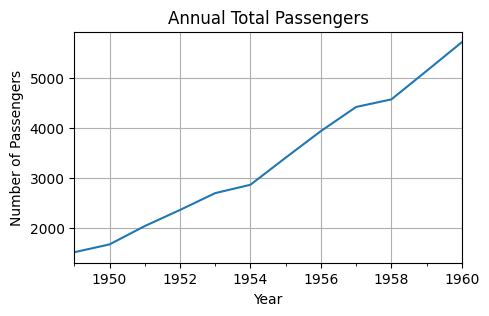

In [99]:
# 리샘플링: 연간 데이터 시각화
plt.figure(figsize=(5, 3))
annual_passengers['passengers'].plot()
plt.title('Annual Total Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [100]:
# 시간 이동: 직전 분기 대비 승객 수 증감률(%)
quarterly = flights['passengers'].resample('QE').sum()
previous_quarter = quarterly.shift(1)
change_rate = (quarterly - previous_quarter) / previous_quarter * 100

quarterly_df = pd.DataFrame({
    'quarterly_passengers': quarterly,
    'change_rate': change_rate
})
print(quarterly_df)

            quarterly_passengers  change_rate
date                                         
1949-03-31                   362          NaN
1949-06-30                   385     6.353591
1949-09-30                   432    12.207792
1949-12-31                   341   -21.064815
1950-03-31                   382    12.023460
1950-06-30                   409     7.068063
1950-09-30                   498    21.760391
1950-12-31                   387   -22.289157
1951-03-31                   473    22.222222
1951-06-30                   513     8.456660
1951-09-30                   582    13.450292
1951-12-31                   474   -18.556701
1952-03-31                   544    14.767932
1952-06-30                   582     6.985294
1952-09-30                   681    17.010309
1952-12-31                   557   -18.208517
1953-03-31                   628    12.746858
1953-06-30                   707    12.579618
1953-09-30                   773     9.335219
1953-12-31                   592  

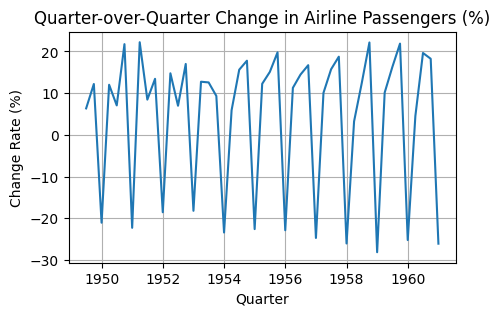

In [101]:
# 시프팅: 직전 분기 대비 승객 수 증감률(%) 시각화
plt.figure(figsize=(5, 3))
plt.plot(quarterly_df['change_rate'])
plt.title('Quarter-over-Quarter Change in Airline Passengers (%)')
plt.xlabel('Quarter')
plt.ylabel('Change Rate (%)')
plt.grid(True)
plt.show()

In [102]:
# 롤링 윈도우: 12개월 단순이동평균
flights['moving_avg_12months'] = flights['passengers'].rolling(window=12).mean()
print(flights)

            passengers  moving_avg_12months
date                                       
1949-01-01         112                  NaN
1949-02-01         118                  NaN
1949-03-01         132                  NaN
1949-04-01         129                  NaN
1949-05-01         121                  NaN
...                ...                  ...
1960-08-01         606           463.333333
1960-09-01         508           467.083333
1960-10-01         461           471.583333
1960-11-01         390           473.916667
1960-12-01         432           476.166667

[144 rows x 2 columns]


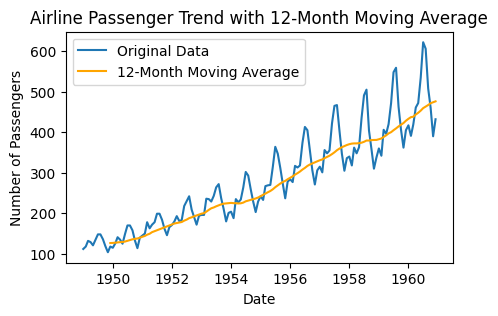

In [103]:
# 롤링 윈도우: 12개월 단순이동평균 시각화
plt.figure(figsize=(5, 3))
plt.plot(flights['passengers'], label='Original Data')
plt.plot(flights['moving_avg_12months'], label='12-Month Moving Average', color='orange')
plt.title('Airline Passenger Trend with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()